## Exercício avaliativo

### Machine Learning

### Prof. Neylson Crepalde

### Lucas Cesar Fernandes Ferreira e Daniel Francisco Fernandes de Oliveira

## ---------------------------------------

In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.discrete.discrete_model import Logit

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

10) This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(h) Which of these methods appears to provide the best results on this data?

### Carregando o banco de dados.

In [5]:
bd = pd.read_csv('Weekly.csv')
bd.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990.0,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990.0,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### (a)Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [8]:
bd.count()

Year         1089
Lag1         1089
Lag2         1089
Lag3         1089
Lag4         1089
Lag5         1089
Volume       1089
Today        1089
Direction    1089
dtype: int64

In [12]:
bd.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [17]:
bd.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [24]:
bd.dtypes

Year         float64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [18]:
bd.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


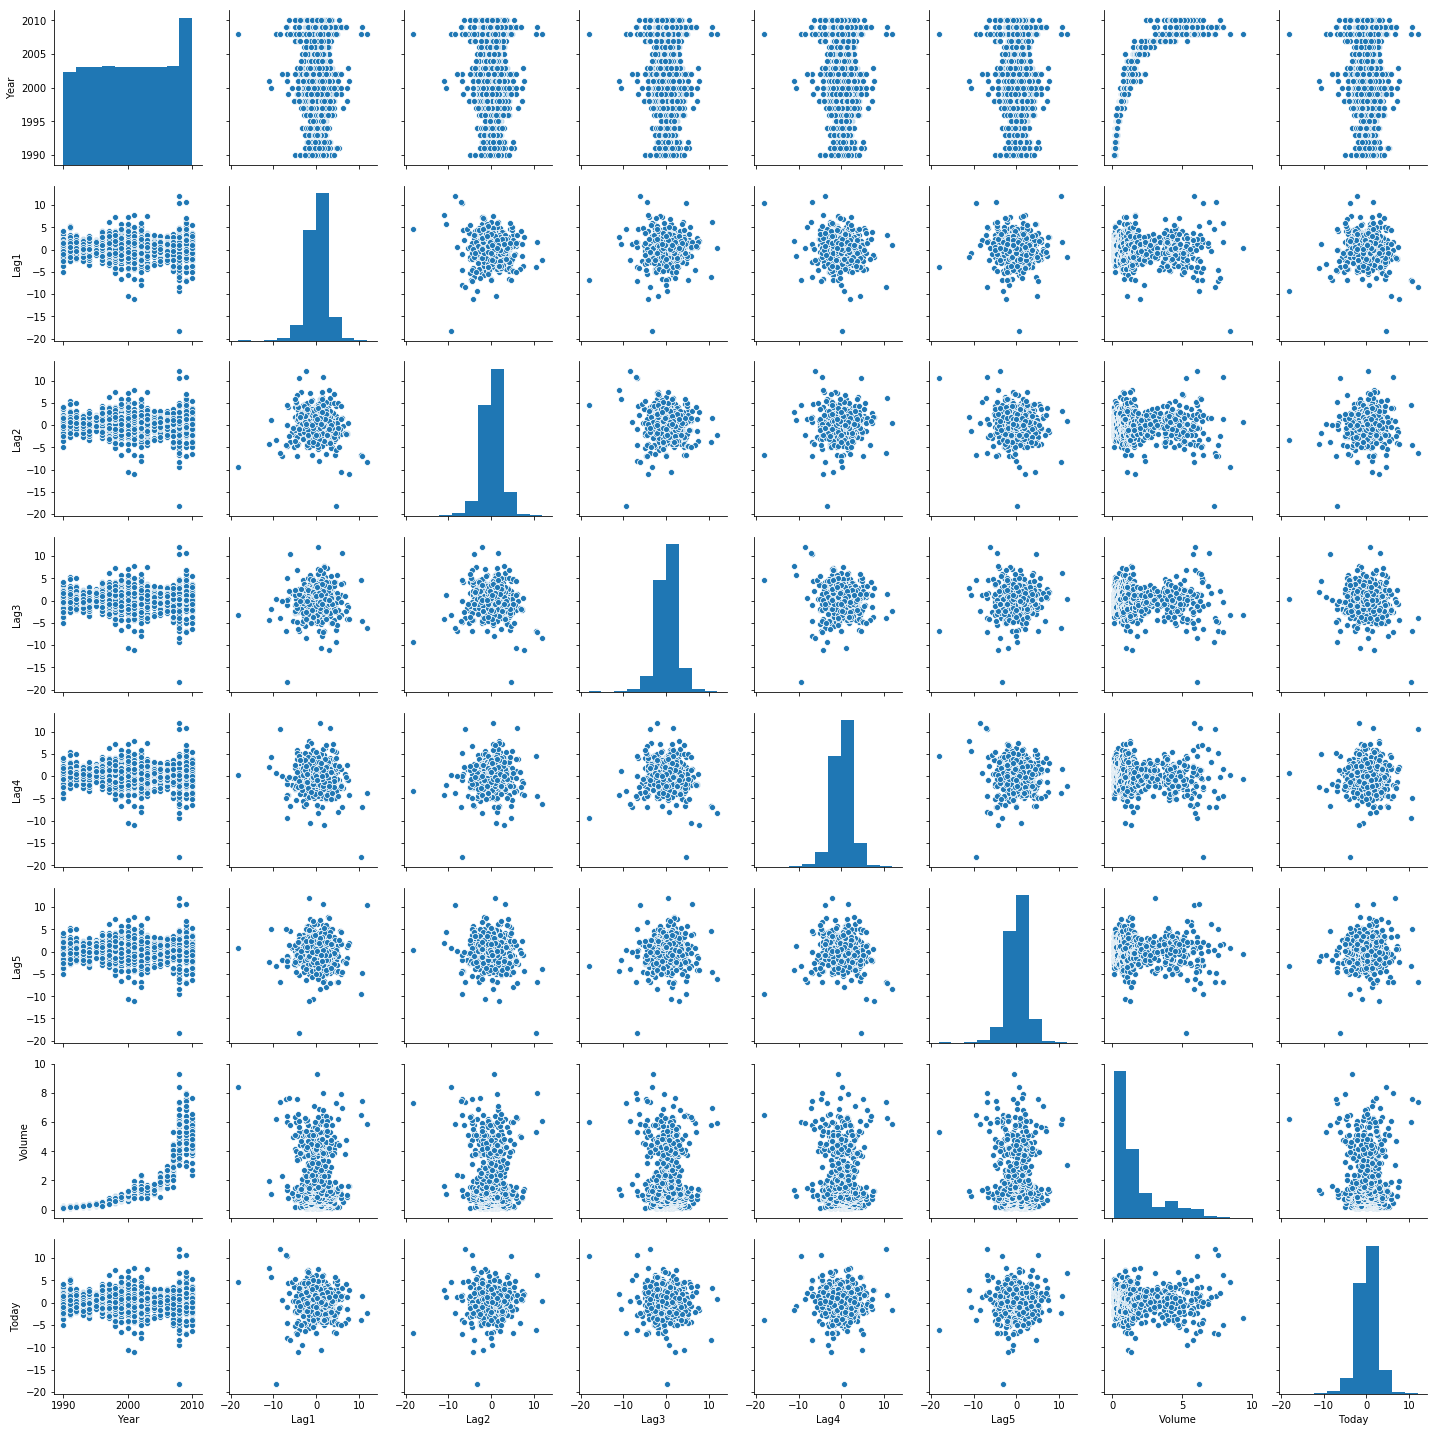

In [26]:
sns.pairplot(bd)

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [32]:
bd_model = pd.get_dummies(bd, drop_first=True)
bd_model.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction_Up'],
      dtype='object')

In [33]:
bd_model.Direction_Up.head()

0    0
1    0
2    1
3    1
4    1
Name: Direction_Up, dtype: uint8

In [66]:
y = bd_model.Direction_Up
X = bd_model[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
#X['intercept'] = 1
X.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [93]:
modelo_weekly_v1 = Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 2.034788
         Iterations 4


In [96]:
print(modelo_weekly_v1.summary())

                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  762
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:                     inf
Time:                        10:45:59   Log-Likelihood:                -1550.5
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0167      0.033     -0.512      0.609      -0.081       0.047
Lag2           0.0316      0.033      0.965      0.335      -0.033       0.096
Lag3          -0.0160      0.032     -0.503      0.6

### Do any of the predictors appear to be statistically significant? If so, which ones?

Segundo o modelo_weekly_v1 a única variável significativa é a 'Volume'.

### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [97]:
probs = modelo_weekly_v1.predict(X_test)

In [98]:
yhat = []
for i in probs:
    if i > 0.5:
        yhat.append(1)
    else:
        yhat.append(0)
yhat = np.array(yhat)
yhat

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [99]:
pd.crosstab(y_test, yhat) # Confusion Matrix

col_0,0,1
Direction_Up,,
0,31,111
1,41,144


Segundo a confusion matrix, o modelo errou muito prevendo a Direction_Down('número 0').

Em 0('DOWN') o modelo acertou 31(0) e errou 111(1). Em 1('UP') o modelo errou 41(0) e acertou 144(1).

### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [151]:
bd_2_train = bd[(bd.Year >= 1990) & (bd.Year <= 2008)]

In [152]:
bd_2_test = bd[bd.Year > 2008]

In [156]:
bd_2_train = pd.get_dummies(bd_2_train, drop_first=True)
bd_2_test = pd.get_dummies(bd_2_test, drop_first=True)

In [158]:
y_2_train = bd_2_train.Direction_Up
X_2_train = bd_2_train['Lag2']
#X['intercept'] = 1
X_2_train.head()

0    1.572
1    0.816
2   -0.270
3   -2.576
4    3.514
Name: Lag2, dtype: float64

In [160]:
y_2_test = bd_2_test.Direction_Up
X_2_test = bd_2_test['Lag2']
#X['intercept'] = 1
X_2_test.head()

985   -1.698
986    6.760
987   -4.448
988   -4.518
989   -2.137
Name: Lag2, dtype: float64

In [348]:
X2_train_1, X2_test_1, y2_train_1, y2_test_1 = train_test_split(X_2_train, y_2_train, test_size=.3, random_state=1)

In [349]:
X2_train_2, X2_test_2, y2_train_2, y2_test_2 = train_test_split(X_2_test, y_2_test, test_size=.3, random_state=1)

In [166]:
modelo_weekly_v2 = Logit(y2_train_1, X2_train_1).fit()

Optimization terminated successfully.
         Current function value: 6.225870
         Iterations 4


In [168]:
print(modelo_weekly_v2.summary())

                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                  689
Model:                          Logit   Df Residuals:                      688
Method:                           MLE   Df Model:                            0
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:                     inf
Time:                        11:35:16   Log-Likelihood:                -4289.6
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0611      0.034      1.780      0.075      -0.006       0.128


In [169]:
probs_2 = modelo_weekly_v2.predict(X2_test_2)

In [330]:
type(probs_2)

pandas.core.series.Series

In [170]:
yhat2 = []
for i in probs_2:
    if i > 0.5:
        yhat2.append(1)
    else:
        yhat2.append(0)
yhat2 = np.array(yhat2)
yhat2

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [171]:
pd.crosstab(y2_test_2, yhat2) # Confusion Matrix

col_0,0,1
Direction_Up,,
0,7,6
1,9,10


### (e) Repeat (d) using LDA.

In [360]:
X2_train_1 = pd.DataFrame(X2_train_1)

In [361]:
y2_train_1 = pd.DataFrame(y2_train_1)

In [362]:
X2_test_2 = pd.DataFrame(X2_test_2)

In [367]:
logreg_lda = LinearDiscriminantAnalysis(solver="eigen")
logreg_lda.fit(X2_train_1, y2_train_1)

C:\Users\lucas.a.ferreira\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [368]:
yhat_lda = logreg_lda.predict(X2_test_2)

In [369]:
pd.crosstab(y2_test_2, yhat_lda)

col_0,0,1
Direction_Up,,
0,6,7
1,8,11


### (f) Repeat (d) using QDA

In [372]:
logreg_qda = QuadraticDiscriminantAnalysis()
logreg_qda.fit(X2_train_1, y2_train_1)

C:\Users\lucas.a.ferreira\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [373]:
yhat_qda = logreg_qda.predict(X2_test_2)
pd.crosstab(y2_test_2, yhat_lda)

col_0,0,1
Direction_Up,,
0,6,7
1,8,11


### (h) Which of these methods appears to provide the best results on this data?

Observando os modelos, todos deram resultados parecidos. Porém por pouco o LDA se saiu melhor.

________________________________________________________________________________________________________________________________

11) In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

(c) Split the data into a training set and a test set.

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

### Carregando o banco de dados

In [377]:
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [380]:
auto.mpg.median()

23.0

In [425]:
auto['mpg01'] = np.where(auto.mpg >= auto.mpg.median(), 1, 0)
auto.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [477]:
auto.horsepower = pd.to_numeric(auto.horsepower, errors='coerce')
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01             int32
dtype: object

In [480]:
auto.horsepower.isna().sum()

5

In [482]:
auto.horsepower.fillna(auto.horsepower.mean(), inplace=True)
auto.horsepower.isna().sum()

0

### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [483]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698,0.834672
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972,-0.760944
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664,-0.754522
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962,-0.662858
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265,-0.757516
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084,0.346069
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314,0.430619
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000,0.509982
mpg01,0.834672,-0.760944,-0.754522,-0.662858,-0.757516,0.346069,0.430619,0.509982,1.000000


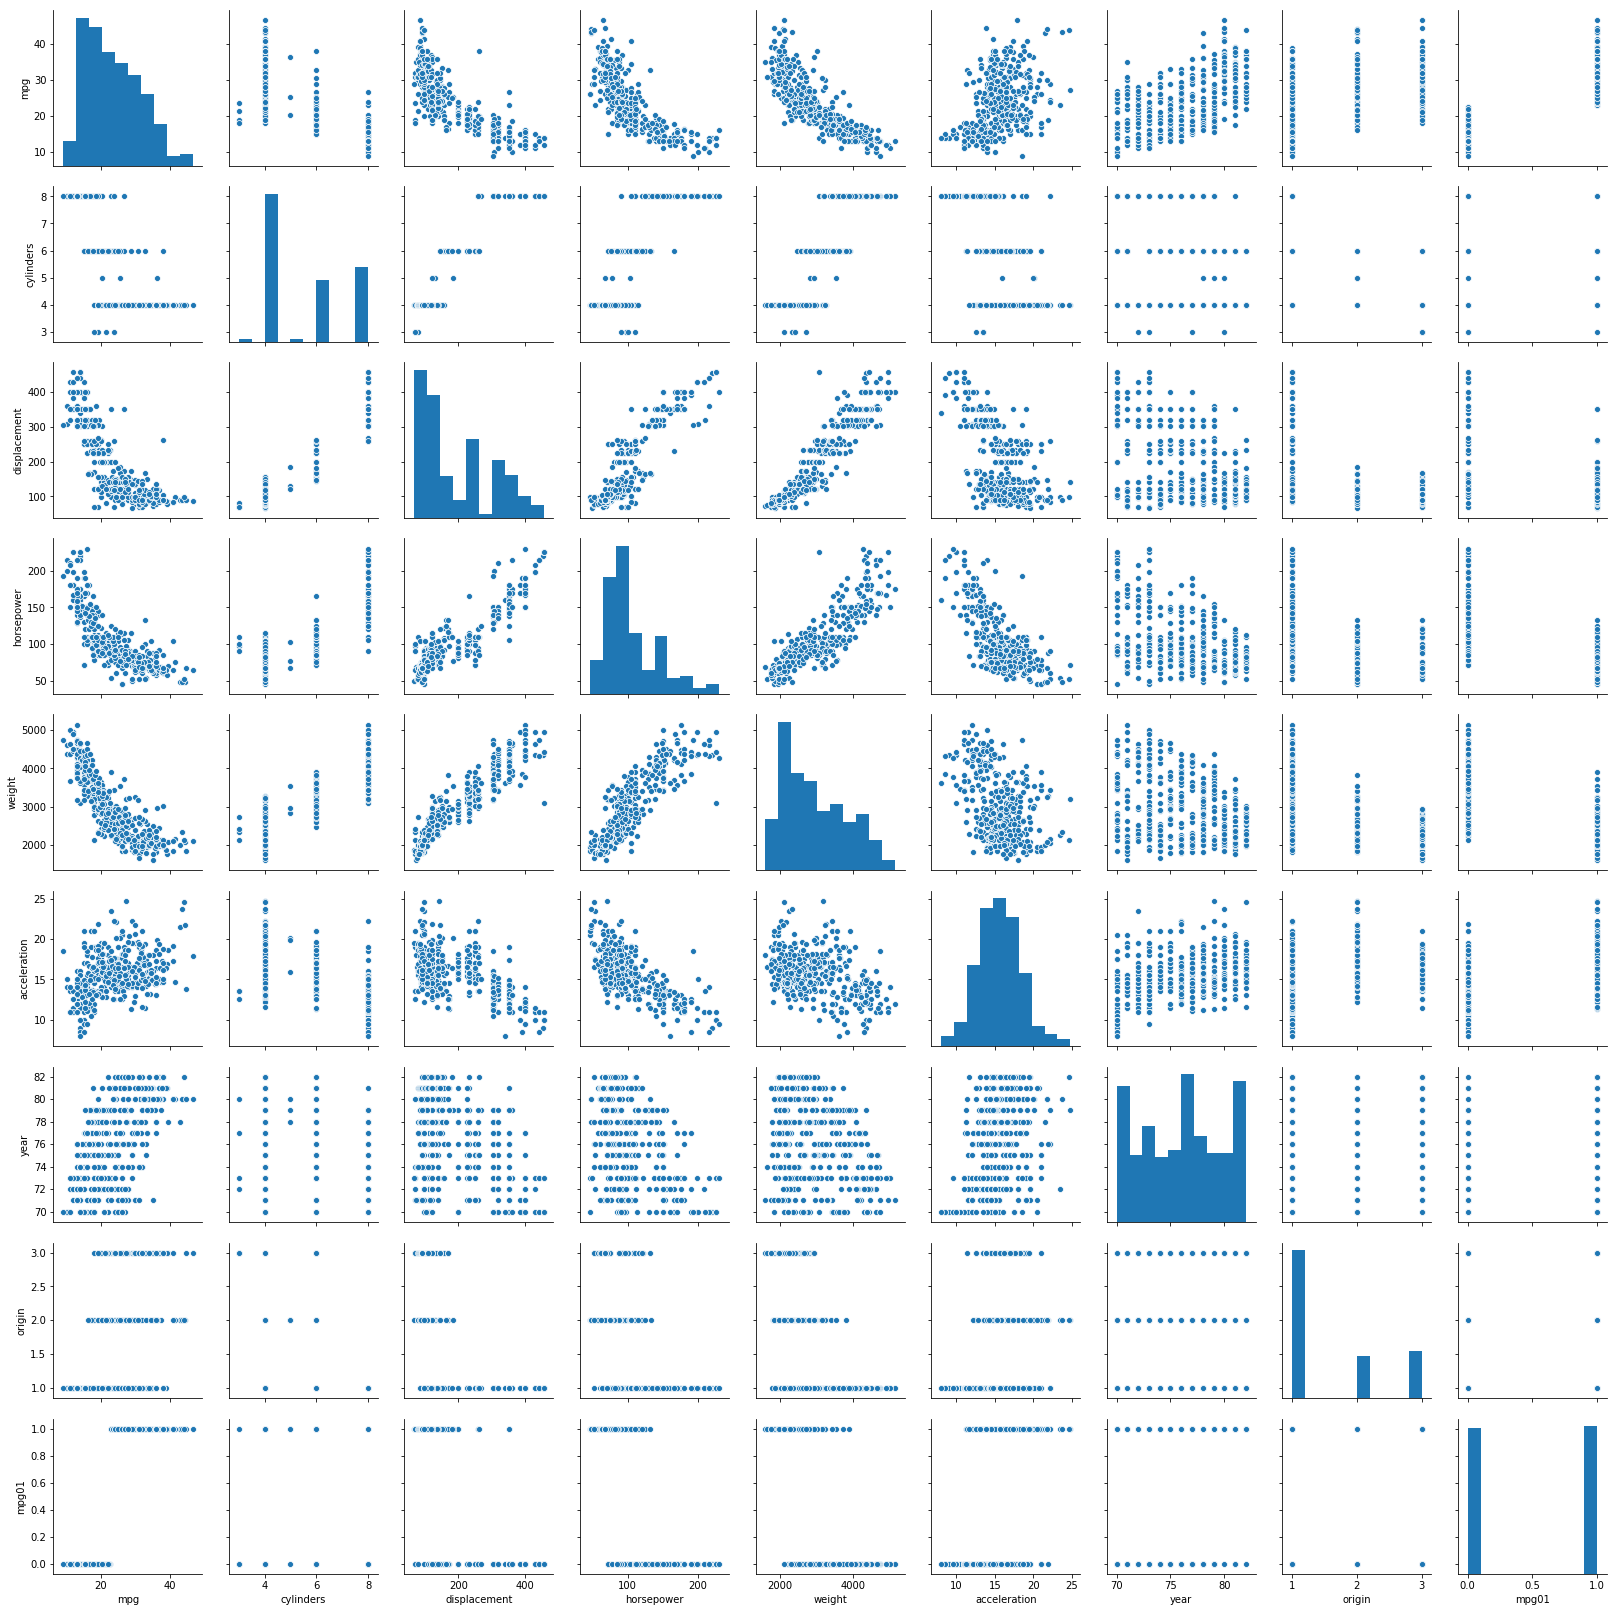

In [484]:
sns.pairplot(auto)

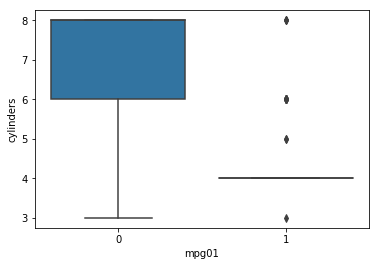

In [463]:
sns.boxplot(x = "mpg01", y = "cylinders", data = auto)

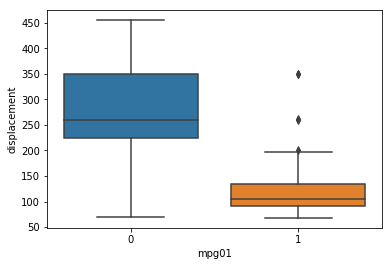

In [462]:
sns.boxplot(x = "mpg01", y = "displacement", data = auto)

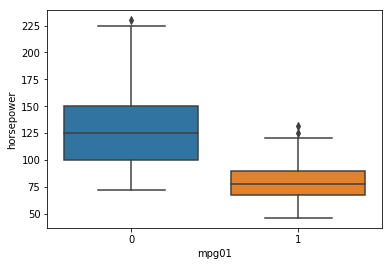

In [485]:
sns.boxplot(x = "mpg01", y = "horsepower", data = auto)

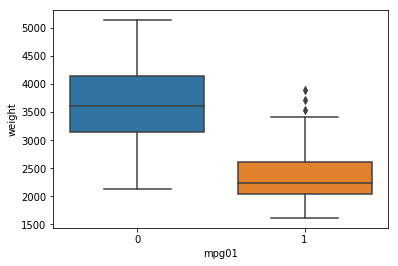

In [464]:
sns.boxplot(x = "mpg01", y = "weight", data = auto)

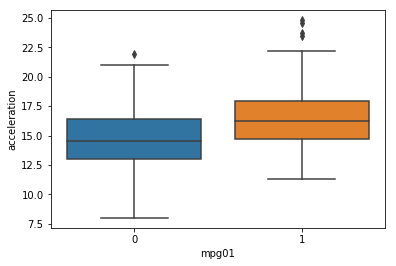

In [465]:
sns.boxplot(x = "mpg01", y = "acceleration", data = auto)

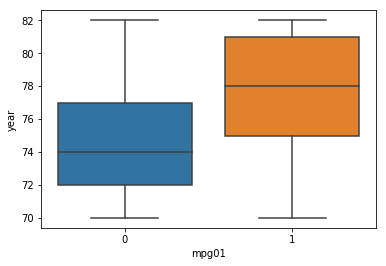

In [466]:
sns.boxplot(x = "mpg01", y = "year", data = auto)

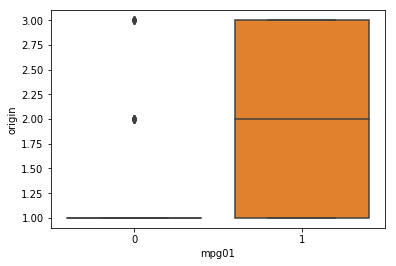

In [467]:
sns.boxplot(x = "mpg01", y = "origin", data = auto)

Existe relação entre mpg01 e cylinders, weight, displacement e horsepower.

### (c) Split the data into a training set and a test set.

In [486]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

In [487]:
y = auto.mpg01
X = auto[['cylinders', 'weight', 'displacement', 'horsepower']]

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

In [493]:
model_auto_lda = LinearDiscriminantAnalysis(solver="eigen")
model_auto_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [494]:
model_auto_lda.coef_

array([[-5.25697358, -0.01115044, -0.01669281,  0.04916172]])

In [495]:
yhat_auto_lda = model_auto_lda.predict(X_test)
pd.crosstab(y_test, yhat_auto_lda)

col_0,0,1
mpg01,,
0,53,7
1,3,57


In [497]:
auc_auto_lda = roc_auc_score(y_test, yhat_auto_lda)
print('AUC for LDA: ', auc_auto_lda)

AUC for LDA:  0.9166666666666666


Segundo a curva ROC o erro do modelo foi de 8%.

### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

In [498]:
model_auto_qda = QuadraticDiscriminantAnalysis()
model_auto_qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [500]:
yhat_auto_qda = model_auto_qda.predict(X_test)
pd.crosstab(y_test, yhat_auto_qda)

col_0,0,1
mpg01,,
0,54,6
1,9,51


In [501]:
auc_auto_qda = roc_auc_score(y_test, yhat_auto_qda)
print("AUC for QDA:", auc_auto_qda)

AUC for QDA: 0.875


Segundo a curva ROC o erro do modelo foi de 12,5%.

### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [503]:
model_auto_logisticReg = LogisticRegression()
model_auto_logisticReg.fit(X_train, y_train)

C:\Users\lucas.a.ferreira\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [504]:
yhat_auto_logisticReg = model_auto_logisticReg.predict(X_test)
pd.crosstab(y_test, yhat_auto_logisticReg)

col_0,0,1
mpg01,,
0,51,9
1,7,53


In [505]:
auc_auto_logisticReg = roc_auc_score(y_test, yhat_auto_logisticReg)
print('AUC for LogistRegression:', auc_auto_logisticReg)

AUC for LogistRegression: 0.8666666666666667


Segundo a curva ROC o erro do modelo foi de 13%.

________________________________________________________________________________________________________________________________

13) Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

### Carregando o banco de dados

In [562]:
boston = pd.read_csv('Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Descrição do dataset Boston.

    
    Origem: Dados da habitação de Boston.
    Uso: Este conjunto de dados pode ser usado para Avaliação.
    Número de Casos: O conjunto de dados contém um total de 506 casos.

    
    Existem 14 variáveis. Eles são:

    CRIM - Taxa de criminalidade per capita por cidade.
    ZN - Proporção de terrenos residenciais destinados a lotes com mais de 25.000 pés quadrados.
    INDUS - Proporção de negócios não varejistas por cidade.
    CHAS - Variável dummy do rio Charles (1 se o trato limita o rio; 0 caso contrário).
    NOX - Concentração de óxidos nítricos (partes por 10 milhões).
    RM - Média de quartos por habitação.
    AGE - Proporção de unidades ocupadas pelo proprietário, construídas antes de 1940.
    DIS - Distâncias ponderadas para cinco centros de emprego de Boston.
    RAD - Índice de acessibilidade a rodovias radiais.
    TAX - Taxa de imposto predial de valor integral por US$10.000.
PTRATIO - Relação aluno-professor por cidade.
B - 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.
LSTAT - % menor status da população.
MEDV - Valor mediano de residências ocupadas pelo proprietário em US $ 1000.

In [510]:
boston.crim.median()

0.25651

In [563]:
boston['crim_01'] = np.where(boston.crim > boston.crim.median(), 1, 0)

In [564]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [523]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
crim_01      int32
dtype: object

In [525]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
crim_01    0
dtype: int64

In [526]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_01
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.500000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.500495
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.500000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [647]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


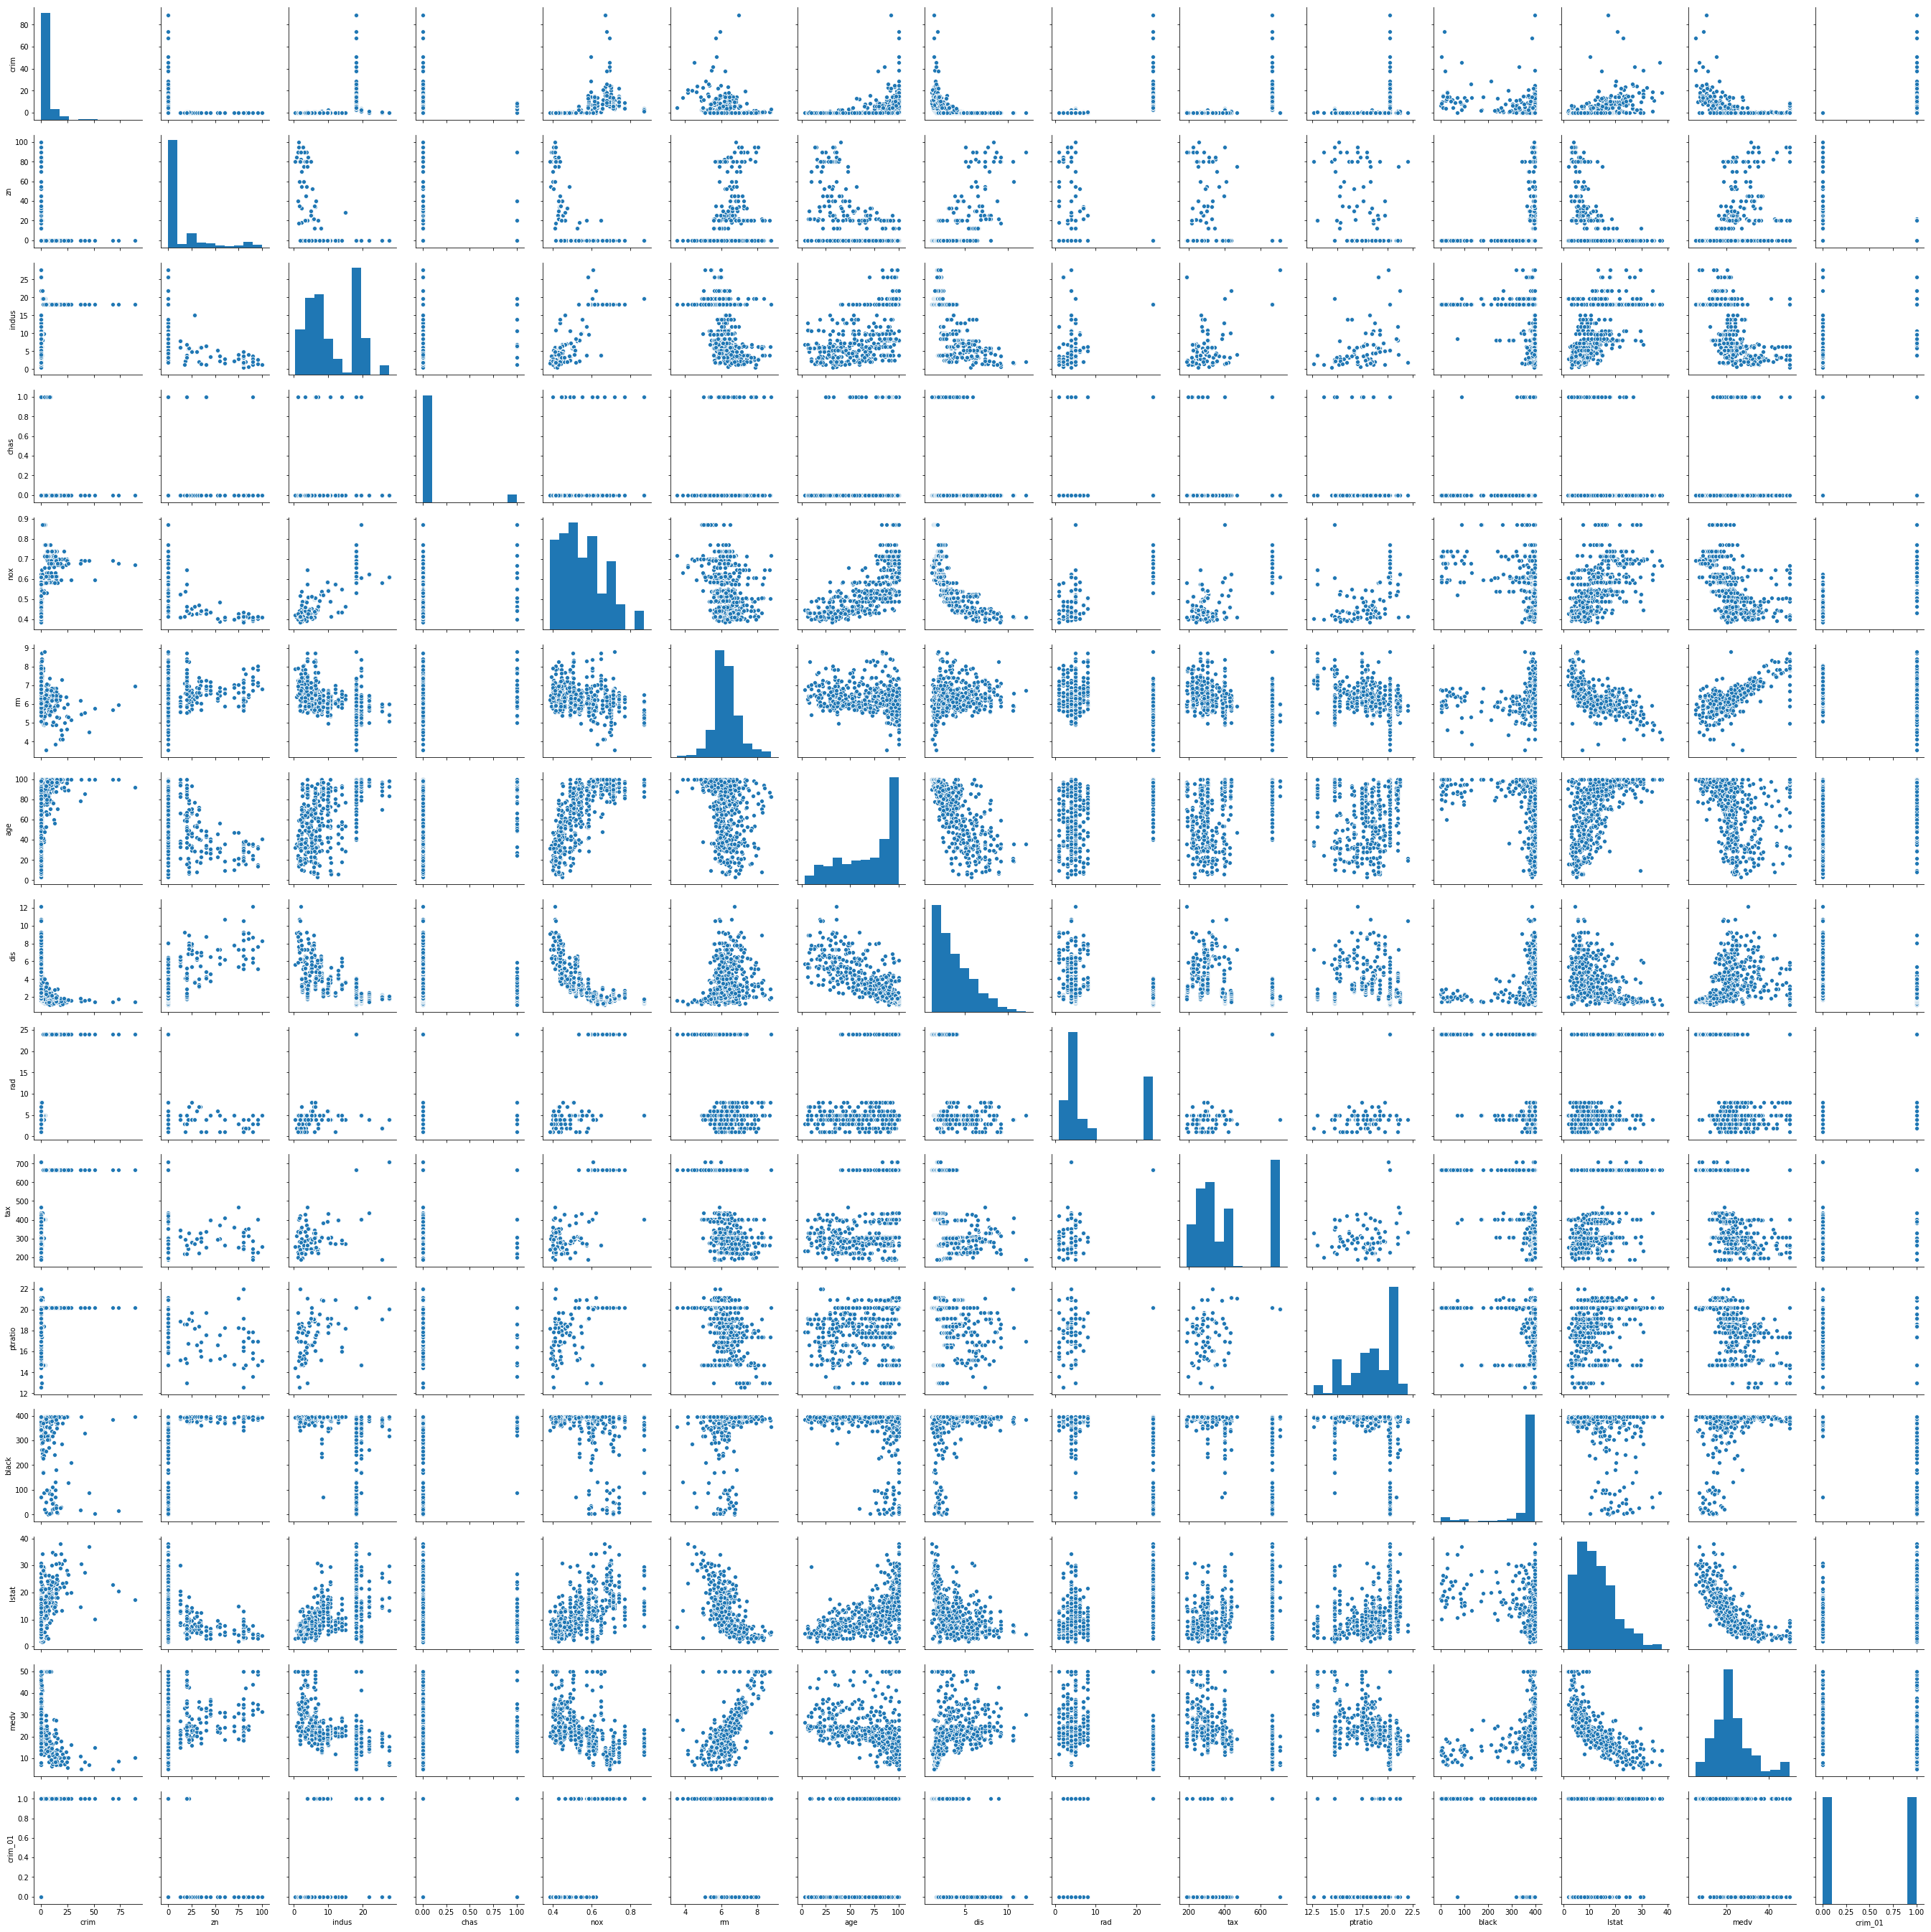

In [648]:
sns.pairplot(boston)

In [651]:
y = boston.crim_01
X = boston.drop(['crim', 'crim_01'], axis=1)

In [652]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X, y, test_size=.3, random_state=1)

### Prevendo com o modelo LogistRegression

In [653]:
model_boston_LogistRegression = LogisticRegression(solver='liblinear')
model_boston_LogistRegression.fit(X_train_boston, y_train_boston)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [654]:
yhat_boston_LogistRegression = model_boston_LogistRegression.predict(X_test_boston)
pd.crosstab(y_test_boston, yhat_boston_LogistRegression)

col_0,0,1
crim_01,,
0,67,8
1,16,61


In [655]:
auc_boston_LogistRegression = roc_auc_score(y_test_boston, yhat_boston_LogistRegression)
print('AUC for LogistRegression:', auc_boston_LogistRegression)

AUC for LogistRegression: 0.8427705627705627


### Prevendo com o modelo LDA

In [593]:
model_boston_lda = LinearDiscriminantAnalysis(solver="eigen")
model_boston_lda.fit(X_train_boston, y_train_boston)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [594]:
yhat_boston_lda = model_boston_lda.predict(X_test_boston)
pd.crosstab(y_test_boston, yhat_boston)

col_0,0,1
crim_01,,
0,75,0
1,26,51


In [595]:
auc_boston = roc_auc_score(y_test_boston, yhat_boston_lda)
print('AUC for LDA:', auc_boston)

AUC for LDA: 0.8562770562770563


### Testando novo modelo de LogistRegression com os dados normalizados na mesma scala.

In [626]:
y_2 = boston.crim_01
X_2 = boston.drop(['crim', 'crim_01'], axis=1)

In [627]:
X_colum = [X_2.columns]
type(X_colum)

list

In [628]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_2)
X_2 = pd.DataFrame(scaler.transform(X_2))
X_2.columns = X_colum
X_2.head()

C:\Users\lucas.a.ferreira\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lucas.a.ferreira\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [641]:
X_train_boston_2, X_test_boston_2, y_train_boston_2, y_test_boston_2 = train_test_split(X_2, y_2, test_size=.35, random_state=1)

In [642]:
model_boston_LogistRegression_2 = LogisticRegression(solver='liblinear')
model_boston_LogistRegression_2.fit(X_train_boston_2, y_train_boston_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [643]:
yhat_boston_LogistRegression_2 = model_boston_LogistRegression_2.predict(X_test_boston_2)
pd.crosstab(y_test_boston_2, yhat_boston_LogistRegression_2)

col_0,0,1
crim_01,,
0,83,5
1,12,78


In [644]:
auc_boston_LogistRegression_2 = roc_auc_score(y_test_boston_2, yhat_boston_LogistRegression_2)
print('AUC for LogistRegression:', auc_boston_LogistRegression_2)

AUC for LogistRegression: 0.9049242424242425


### Conclusão:

Nos dois primeiro modelos percebemos que houve uma semelhança atraves da curva ROC nos resultados obtidos, depois executei um novo modelo de LogistRegression so que dessa vez eu normalizei os dados com a mesma escala e mudei um pouco na quantidade de dados de treino e teste, com isso consegui um aumento significativo de precisão do modelo, chegando a um valor AUC de 0.90.